In [1386]:
'''
Replace U1 with quantum gates instead of matrix
'''
from qiskit import transpile, QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.circuit.library.standard_gates import XGate
from qiskit.providers.basic_provider import BasicSimulator

# Discrete Quantum Random Walks On The Line

This is a notebook about random walks on the line


## quantum version of the unitary matrix


### Initialize State

this function maps an integer number from bits to qubits

for 3 bits n=3  

000 -> |000>  
001 -> |001>  
...  
2^n -> |2^n>  

for n bits we have 2^n different states

In [1387]:
def initialize_state(qc, digits):
    for i, digit in enumerate(reversed(digits)):
        if digit == '1':
            qc.x(i)

### Input


In [1388]:
num = "00001"

### Circuit Initialization
The Quantum circuit has quantum registers to execute the algorithm
and classical registers to measure the results

In [1389]:
num_of_qubits = len(num)
qubits = list(range(num_of_qubits))

cr = ClassicalRegister(num_of_qubits)
qr = QuantumRegister(num_of_qubits)
qc = QuantumCircuit(qr, cr)

### State initialization

In [1390]:
initialize_state(qc, num)

### Transition State

Transition state creates either the operator of |i> -> |i + 1>
Or |i> -> |i - 1> if control state is 0

In [1391]:
def transition_state(qc, num, ctrl_state=None):
    for target_qubit in range(len(num) - 1, 0, -1):
        qargs = [control_qubit for control_qubit in range(target_qubit)]
        qargs.append(target_qubit)
        cx_gate = XGate().control(target_qubit, ctrl_state=ctrl_state)
        qc.append(cx_gate, qargs)
    qc.x(0)

In [1392]:
Uplus_op = transition_state(qc, num)
# Uplus_controlled = Uplus_op.control(1)

# Uminus_op = transition_state(qc, num, ctrl_state=0)
# Uminus_controlled = Uminus_op.control(1, ctrl_state=0)

In [1393]:
# steps = 3
# for step in range(steps):
#     qc.h(0)
#     qc.append(Uplus_controlled, qubits)
#     qc.append(Uminus_controlled, qubits)

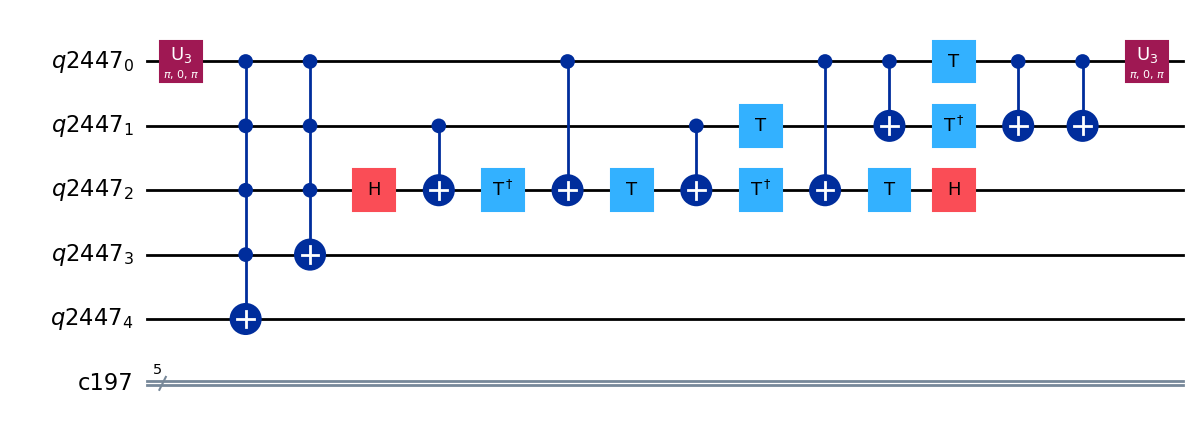

In [1394]:
qc.decompose().draw('mpl')

In [1395]:
qc.measure(qubits, qubits)

backend = BasicSimulator()
tqc = transpile(qc, backend)
counts = backend.run(tqc).result().get_counts()
print(counts)

{'00010': 1024}
